In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scores/scores.csv


# Imported libraries

In [57]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [58]:
# Download latest version
path = kagglehub.dataset_download("samarsaeedkhan/scores")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/scores


In [59]:
# Build the full file path to the CSV file inside the dataset folder
csv_path = f"{path}/scores.csv"

# Read the CSV file into a pandas DataFrame
studentscore_df = pd.read_csv(csv_path)

# Preview the data
print(f"Raw data Shape: {studentscore_df.shape}")
studentscore_df.head()

Raw data Shape: (200, 6)


,Python,Sql,ML,Tableau,Excel,Student Placed
0,0.80,0.57,0.63,0.50,0.34,Yes
1,0.81,0.90,0.62,0.71,0.92,No
2,0.49,0.69,0.62,0.64,0.41,No
3,0.40,0.94,0.60,0.26,0.47,No
4,0.31,0.87,1.00,0.23,0.99,No


# Data Cleaning and Analysis

In [60]:
# Show descriptive statistics (count, mean, std, min, quartiles, max) 
studentscore_df.describe()

,Python,Sql,ML,Tableau,Excel
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.514100,0.495850,0.514350,0.495150,0.474950
std,0.305749,0.290694,0.285211,0.292463,0.281686
min,0.000000,0.010000,0.000000,0.010000,0.000000
25%,0.237500,0.227500,0.267500,0.240000,0.227500
50%,0.545000,0.490000,0.540000,0.500000,0.485000
75%,0.800000,0.740000,0.770000,0.740000,0.702500
max,1.000000,1.000000,1.000000,1.000000,0.990000


In [61]:
# Inspect data structure
studentscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Python          200 non-null    float64
 1   Sql             200 non-null    float64
 2   ML              200 non-null    float64
 3   Tableau         200 non-null    float64
 4   Excel           200 non-null    float64
 5   Student Placed  200 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


In [62]:
# Check for missing values in each column of the dataset
# Returns a Series with column names as index and number of nulls as values
studentscore_df.isnull().sum()

Python            0
Sql               0
ML                0
Tableau           0
Excel             0
Student Placed    0
dtype: int64

In [63]:
# Check for N/A values in each column of the dataset
studentscore_df.isna().sum()

Python            0
Sql               0
ML                0
Tableau           0
Excel             0
Student Placed    0
dtype: int64

In [64]:
# Check for 0 values in each column of the dataset
(studentscore_df == 0).sum()

Python            3
Sql               0
ML                2
Tableau           0
Excel             1
Student Placed    0
dtype: int64

In [65]:
# Drop and fill N/A value
studentscore_df = studentscore_df.dropna()
studentscore_df = studentscore_df.fillna(0)
studentscore_df.shape

(200, 6)

In [66]:
# Standardize column names
studentscore_df.columns = (
    studentscore_df.columns
    .str.strip()  # Remove leading/trailing whitespace from column names
    .str.replace(r"\s+", "_", regex=True)    # Replace all sequences of whitespace with a single underscore (e.g., 'col name' -> 'col_name')
    .str.replace(r"[^\w_]", "", regex=True)) # Remove all non-alphanumeric characters except underscores (e.g., punctuation, symbols)

In [67]:
# Select columns with numerical data types (integers, floats) and store their names in a list
num_cols = studentscore_df.select_dtypes(include=[np.number]).columns.tolist()

# Select columns with object (string/text) or category data types and store their names in a list
cat_cols = studentscore_df.select_dtypes(include=["object", "category"]).columns.tolist()

# Preview the columns
print(f"Numeric data columns: {num_cols}")
print(f"Categorical data columns: {cat_cols}")

Numeric data columns: ['Python', 'Sql', 'ML', 'Tableau', 'Excel']
Categorical data columns: ['Student_Placed']


In [68]:
# If numerical columns exist, calculate and print the descriptive statistics 
if num_cols:
    # .T (transpose) is used to display the statistics as rows and column names as columns for better readability.
    print("\nDescriptive stats (numeric):\n", studentscore_df[num_cols].describe().T)


Descriptive stats (numeric):
          count     mean       std   min     25%    50%     75%   max
Python   200.0  0.51410  0.305749  0.00  0.2375  0.545  0.8000  1.00
Sql      200.0  0.49585  0.290694  0.01  0.2275  0.490  0.7400  1.00
ML       200.0  0.51435  0.285211  0.00  0.2675  0.540  0.7700  1.00
Tableau  200.0  0.49515  0.292463  0.01  0.2400  0.500  0.7400  1.00
Excel    200.0  0.47495  0.281686  0.00  0.2275  0.485  0.7025  0.99


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


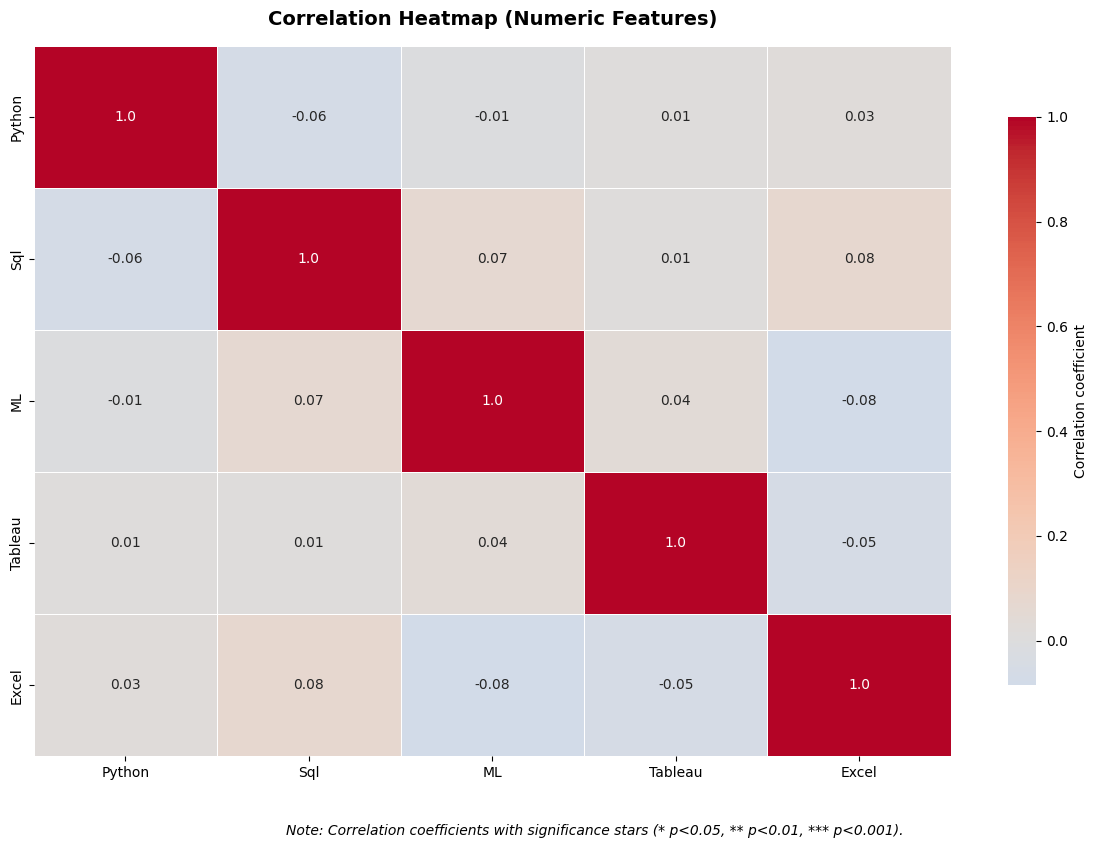

In [69]:
from scipy import stats

if len(num_cols) >= 2:
    # Compute correlation matrix
    corr = studentscore_df[num_cols].corr(numeric_only=True)

    # Compute p-values
    pvals = pd.DataFrame(index=num_cols, columns=num_cols, dtype=float)
    for i in num_cols:
        for j in num_cols:
            if i == j:
                pvals.loc[i, j] = np.nan
            else:
                _, p = stats.pearsonr(studentscore_df[i], studentscore_df[j])
                pvals.loc[i, j] = p

    # Function for significance stars
    def stars(p):
        if p < 0.001: return "***"
        elif p < 0.01: return "**"
        elif p < 0.05: return "*"
        else: return ""

    # Build annotation DataFrame with corr + stars
    annot = corr.round(2).astype(str)
    for i in num_cols:
        for j in num_cols:
            if i != j and not pd.isna(pvals.loc[i, j]):
                annot.loc[i, j] += stars(pvals.loc[i, j])

    # ---- FULL heatmap (NO masking) ----
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr,
        annot=annot,        # string annotations
        fmt="",             # <-- FIX: prevents format error
        cmap="coolwarm",
        center=0,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlation coefficient"}
    )

    # Title & caption
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, fontweight="bold", pad=15)
    plt.figtext(
        0.5, -0.05,
        "Note: Correlation coefficients with significance stars (* p<0.05, ** p<0.01, *** p<0.001).",
        wrap=True, ha="center", fontsize=10, style="italic"
    )

    plt.tight_layout()
    plt.show()

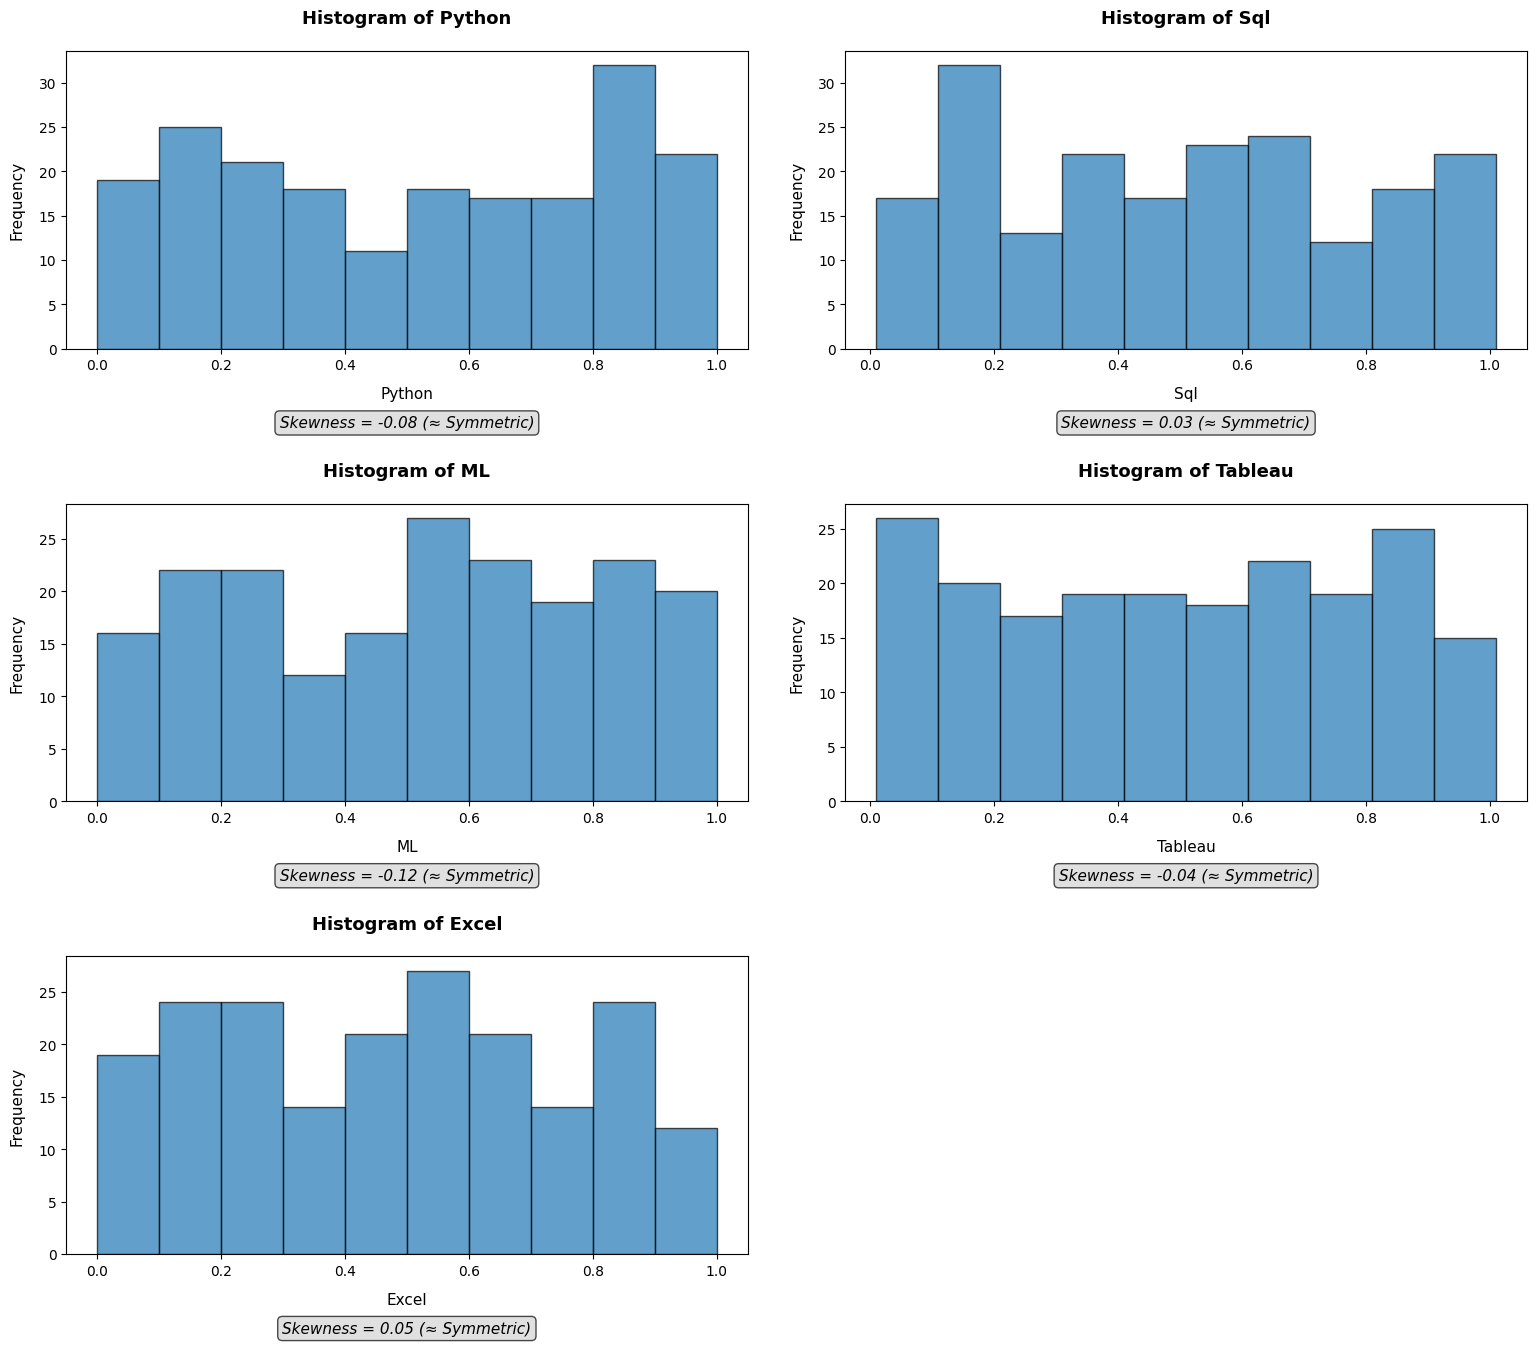

In [70]:
from scipy.stats import skew

cols_to_plot = num_cols[:8]  # up to 8 numeric columns
n = len(cols_to_plot)

# Calculate rows for 2-column layout
ncols = 2
nrows = int(np.ceil(n / ncols))

# Increase figure size and adjust subplot parameters
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    data = studentscore_df[col].dropna()

    # Define bins (0.1 step)
    bins = np.arange(data.min(), data.max() + 0.1, 0.1)

    # Histogram with black edges
    axes[i].hist(data, bins=bins, edgecolor="black", alpha=0.7)

    # Title with more padding
    axes[i].set_title(f"Histogram of {col}", pad=20, fontsize=13, fontweight="bold")

    # Labels
    axes[i].set_xlabel(col, fontsize=11, labelpad=10)
    axes[i].set_ylabel("Frequency", fontsize=11, labelpad=10)

    # Skewness with interpretation
    skew_val = skew(data)
    if abs(skew_val) < 0.5:
        skew_label = "≈ Symmetric"
    elif skew_val > 0.5:
        skew_label = "Right-tailed skew"
    else:  # skew_val < -0.5
        skew_label = "Left-tailed skew"

    # Move caption further down and increase font size
    axes[i].text(
        0.5, -0.25,  # Increased vertical position
        f"Skewness = {skew_val:.2f} ({skew_label})",
        ha="center", va="center", transform=axes[i].transAxes,
        fontsize=11, style="italic", bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
    
    # Adjust tick parameters for better readability
    axes[i].tick_params(axis='both', which='major', labelsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Significantly increase spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5)  # Increased spacing
plt.tight_layout(pad=3.0)  # Add padding around the entire figure
plt.show()

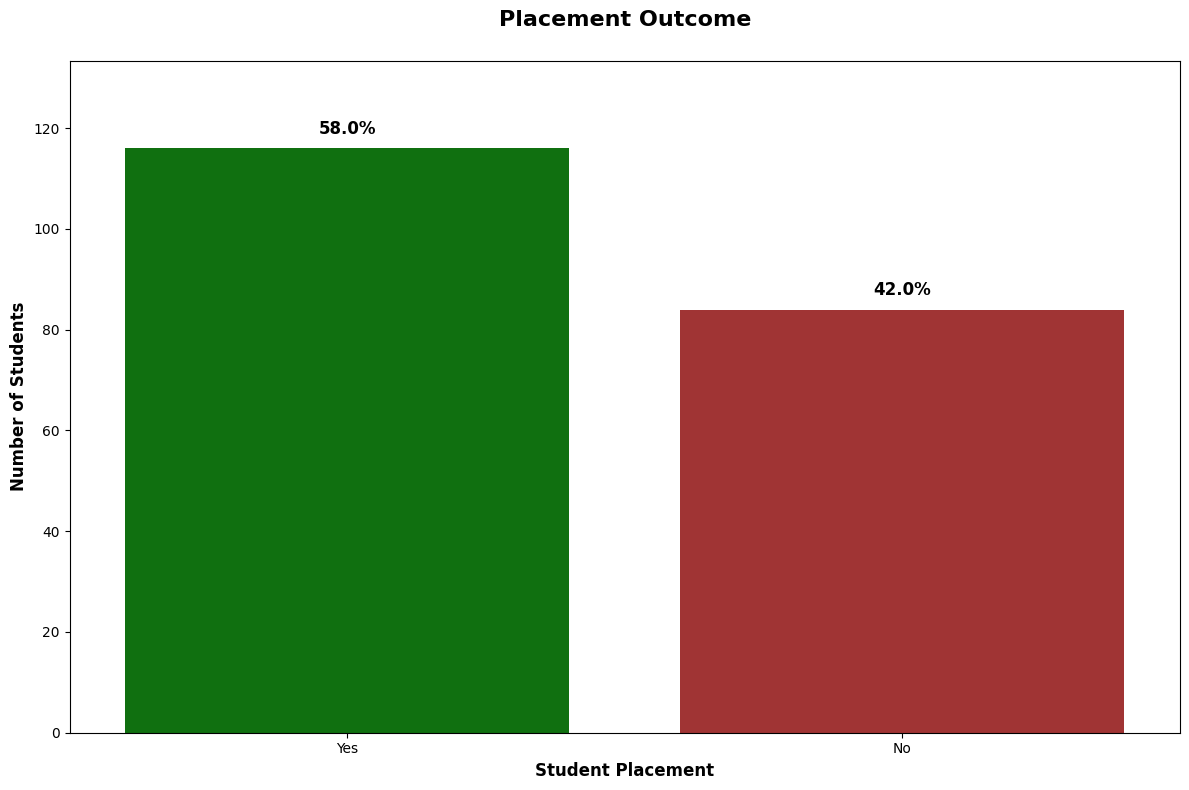

In [71]:
# Define custom colors for placement outcomes
custom_colors = {"Yes": "green", "No": "firebrick"}

# Iterate through categorical columns
for column in cat_cols:
    plt.figure(figsize=(12, 8))  # Larger figure for readability
    
    # Count values (only top 2 categories: Yes/No)
    counts = studentscore_df[column].value_counts().head(2)
    total_count = counts.sum()
    
    # Map custom colors to bars
    bar_colors = [custom_colors.get(cat, "gray") for cat in counts.index]
    
    # Barplot
    ax = sns.barplot(
        x=counts.index,
        y=counts.values,
        palette=bar_colors
    )
    
    # Annotate bars with % labels (closer to bars)
    for i, count_value in enumerate(counts.values):
        percentage = (count_value / total_count) * 100
        ax.text(
            i,                                   # bar index
            count_value + (total_count * 0.01),  # smaller offset = closer label
            f"{percentage:.1f}%",                
            ha="center", va="bottom",
            fontsize=12, fontweight="bold"
        )
    

    # Axis labels
    plt.xlabel("Student Placement", fontsize=12, fontweight="bold")
    plt.ylabel("Number of Students", fontsize=12, fontweight="bold")
    plt.title("Placement Outcome", fontsize=16, fontweight="bold", pad=25)
    
    # Expand y-axis slightly for labels
    ax.set_ylim(0, max(counts.values) * 1.15)
    
    # Adjust spacing
    plt.tight_layout()
    plt.show()

In [72]:
# Suppose your dataframe is df
# Create dummy variable for placement
studentscore_df.columns

Index(['Python', 'Sql', 'ML', 'Tableau', 'Excel', 'Student_Placed'], dtype='object')

In [73]:
# Create dummy variable for placement
studentscore_df['Placement_Dummy'] = studentscore_df['Student_Placed'].map({'Yes': 1, 'No': 0})

# Drop the original column (use inplace=True so it updates directly)
studentscore_df.drop(['Student_Placed'], axis=1, inplace=True)

# Calculate average skill levels
placed_avg = studentscore_df[studentscore_df['Placement_Dummy'] == 1][['Python', 'Sql', 'ML', 'Tableau', 'Excel']].mean()
notplaced_avg = studentscore_df[studentscore_df['Placement_Dummy'] == 0][['Python', 'Sql', 'ML', 'Tableau', 'Excel']].mean()

print("Average skill levels for placed students:\n", placed_avg)
print("\nAverage skill levels for not placed students:\n", notplaced_avg)

# Comparison difference
group_avg = placed_avg - notplaced_avg
print("\nComparison between placed (1) and not placed (0):\n", group_avg)

Average skill levels for placed students:
 Python     0.509397
Sql        0.495172
ML         0.536207
Tableau    0.506638
Excel      0.484569
dtype: float64

Average skill levels for not placed students:
 Python     0.520595
Sql        0.496786
ML         0.484167
Tableau    0.479286
Excel      0.461667
dtype: float64

Comparison between placed (1) and not placed (0):
 Python    -0.011199
Sql       -0.001613
ML         0.052040
Tableau    0.027352
Excel      0.022902
dtype: float64


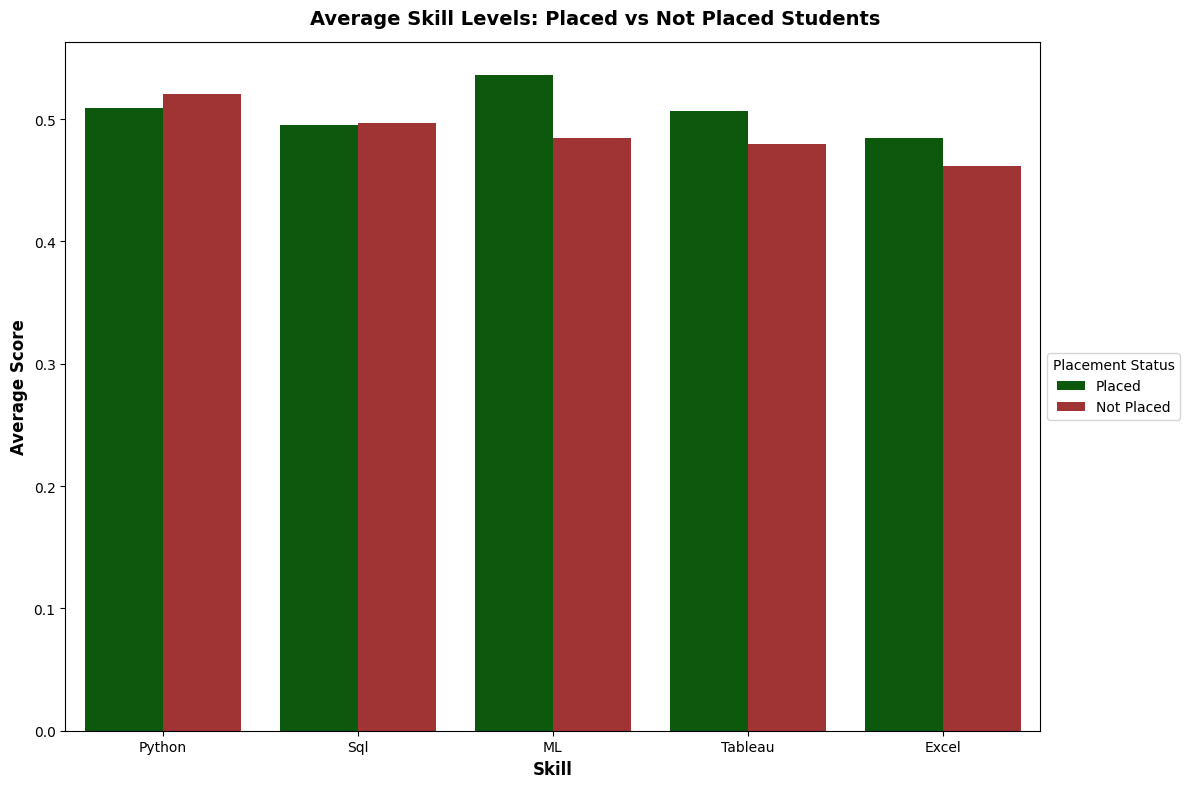

In [74]:
# Convert results into DataFrame for plotting
studentscore_df_plot = pd.DataFrame({
    "Skill": placed_avg.index,
    "Placed": placed_avg.values,
    "Not Placed": notplaced_avg.values})

# Melt for grouped bar chart
studentscore_df_melt = studentscore_df_plot.melt(id_vars="Skill", var_name="Placement", value_name="Average Score")


# Custom colors for placed vs not placed
palette_colors = {"Placed": "darkgreen", "Not Placed": "firebrick"} # Other red colour: "red", "firebrick", "darkred", "indianred", "crimson", "lightcoral", "salmon", "darksalmon", "tomato", "coral"

plt.figure(figsize=(12,8))

sns.barplot(
    x="Skill", y="Average Score", hue="Placement",
    data=studentscore_df_melt, palette=palette_colors
)

# Title centered for the whole figure
plt.suptitle(
    "Average Skill Levels: Placed vs Not Placed Students",
    fontsize=14, fontweight="bold", x=0.5
)

# Axis labels
plt.ylabel("Average Score", fontsize=12, fontweight="bold")
plt.xlabel("Skill", fontsize=12, fontweight="bold")

# Legend positioned outside center right
plt.legend(
    title="Placement Status",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.tight_layout()
plt.show()

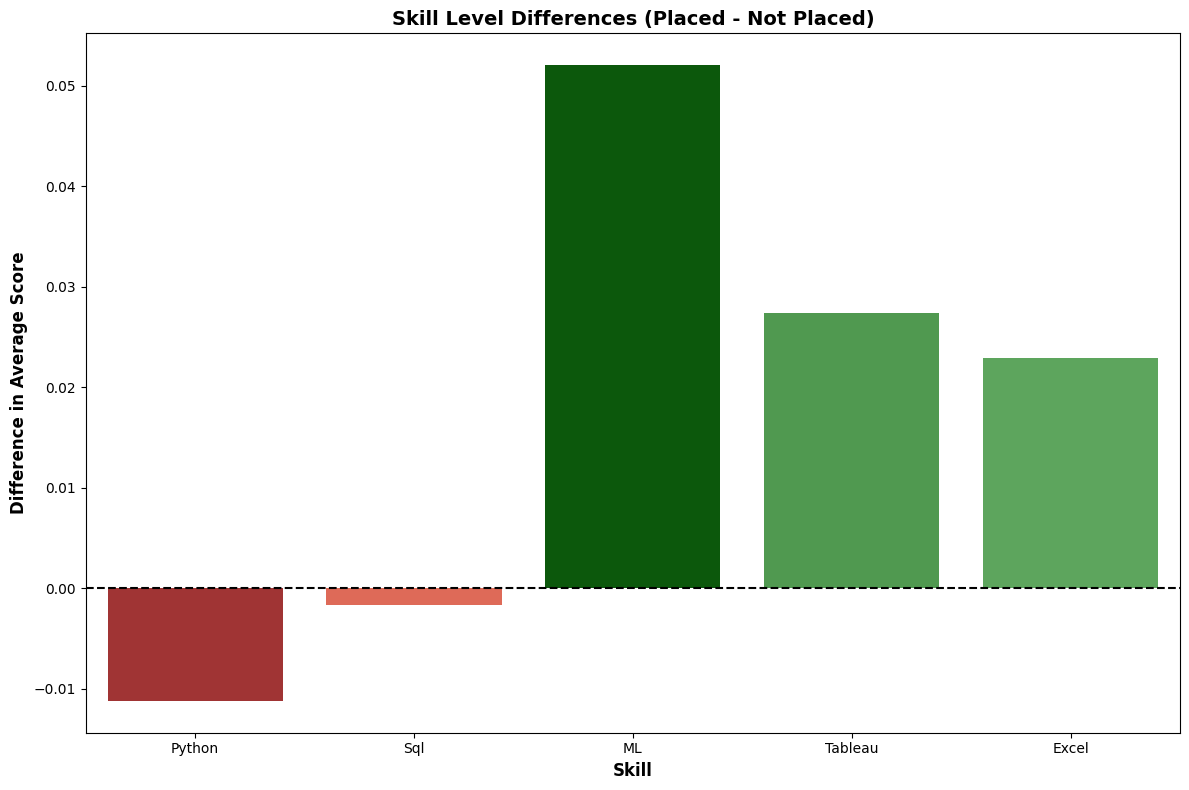

In [75]:
from matplotlib.colors import LinearSegmentedColormap

# Calculate difference
studentscore_df_plot["Difference (Placed - Not Placed)"] = (studentscore_df_plot["Placed"] - studentscore_df_plot["Not Placed"])

# Define custom colormaps
green_cmap = LinearSegmentedColormap.from_list("custom_green", ["lightgreen", "darkgreen"])
red_cmap = LinearSegmentedColormap.from_list("custom_red", ["tomato", "firebrick"])

# Normalize separately for positive and negative values
pos_vals = studentscore_df_plot["Difference (Placed - Not Placed)"].clip(lower=0)
neg_vals = -studentscore_df_plot["Difference (Placed - Not Placed)"].clip(upper=0)

pos_norm = plt.Normalize(vmin=0, vmax=pos_vals.max())
neg_norm = plt.Normalize(vmin=0, vmax=neg_vals.max())

# Assign colors
colors = []
for val in studentscore_df_plot["Difference (Placed - Not Placed)"]:
    if val > 0:
        colors.append(green_cmap(pos_norm(val)))
    else:
        colors.append(red_cmap(neg_norm(-val)))

# Plot
plt.figure(figsize=(12,8))
sns.barplot(
    x="Skill", 
    y="Difference (Placed - Not Placed)", 
    data=studentscore_df_plot, 
    palette=colors
)

# Reference line
plt.axhline(0, color="black", linestyle="--")

# Titles and labels
plt.title("Skill Level Differences (Placed - Not Placed)", fontsize=14, fontweight="bold")
plt.ylabel("Difference in Average Score", fontsize=12, fontweight="bold")
plt.xlabel("Skill", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

In [76]:
# Calculate total skill score for each student
studentscore_df['Total_Score'] = studentscore_df[['Python', 'Sql', 'ML', 'Tableau', 'Excel']].sum(axis=1)

# Average total score by placement
placed_total_avg = studentscore_df[studentscore_df['Placement_Dummy'] == 1]['Total_Score'].mean()
notplaced_total_avg = studentscore_df[studentscore_df['Placement_Dummy'] == 0]['Total_Score'].mean()

print("Average Total Score for placed students:", placed_total_avg)
print("Average Total Score for not placed students:", notplaced_total_avg)

# Difference
print("\nDifference in Total Score (Placed - Not Placed):", placed_total_avg - notplaced_total_avg)

Average Total Score for placed students: 2.53198275862069
Average Total Score for not placed students: 2.4425000000000003

Difference in Total Score (Placed - Not Placed): 0.08948275862068966


In [77]:
from scipy import stats

# Split groups
placed_scores = studentscore_df[studentscore_df['Placement_Dummy'] == 1]['Total_Score']
notplaced_scores = studentscore_df[studentscore_df['Placement_Dummy'] == 0]['Total_Score']

# Independent samples t-test (unequal variances allowed)
t_stat, p_value = stats.ttest_ind(placed_scores, notplaced_scores, equal_var=False)

print("Average Total Score (Placed):", placed_scores.mean())
print("Average Total Score (Not Placed):", notplaced_scores.mean())
print("\nT-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("\nResult: Significant difference in total scores between placed and not placed students (p < 0.05).")
else:
    print("\nResult: No significant difference in total scores (p >= 0.05).")

Average Total Score (Placed): 2.53198275862069
Average Total Score (Not Placed): 2.4425000000000003

T-statistic: 0.9627733227566466
P-value: 0.3369313872576414

Result: No significant difference in total scores (p >= 0.05).


Optimization terminated successfully.
         Current function value: 0.673742
         Iterations 4
            dy/dx  abs_effect  percent_contribution
Python  -0.031293    0.031293              8.106129
Sql     -0.025342    0.025342              6.564595
ML       0.161760    0.161760             41.901951
Tableau  0.076483    0.076483             19.812141
Excel    0.091165    0.091165             23.615184


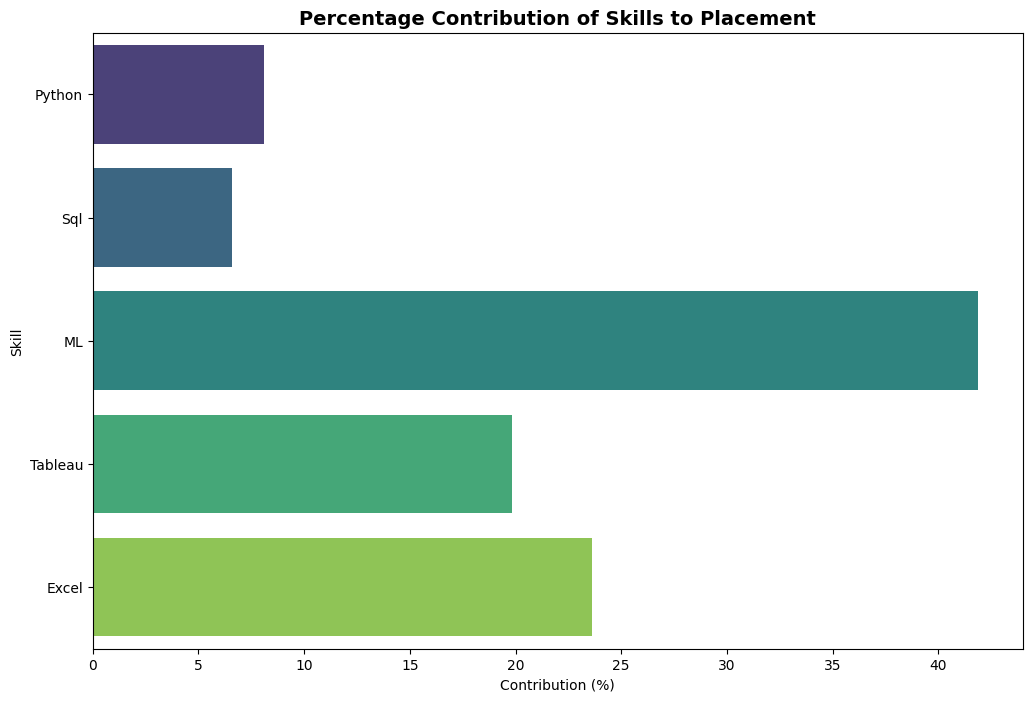

In [78]:
import statsmodels.api as sm

# Independent variables
X = studentscore_df[['Python', 'Sql', 'ML', 'Tableau', 'Excel']]
X = sm.add_constant(X)
Y = studentscore_df['Placement_Dummy']

# Logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Marginal Effects (Average Partial Effects)
marginal_effects = result.get_margeff(at='overall').summary_frame()

# Extract only skills (exclude constant)
skill_effects = marginal_effects.loc[['Python','Sql','ML','Tableau','Excel'], ['dy/dx']]

# Convert to percentages of total absolute contribution
skill_effects['abs_effect'] = skill_effects['dy/dx'].abs()
skill_effects['percent_contribution'] = 100 * skill_effects['abs_effect'] / skill_effects['abs_effect'].sum()

print(skill_effects)

# Visualization
plt.figure(figsize=(12,8))
sns.barplot(x="percent_contribution", y=skill_effects.index, data=skill_effects, palette="viridis")
plt.title("Percentage Contribution of Skills to Placement", fontsize=14, fontweight='bold')
plt.xlabel("Contribution (%)")
plt.ylabel("Skill")
plt.show()

Optimization terminated successfully.
         Current function value: 0.673742
         Iterations 4
            dy/dx  percent_contribution
ML       0.161760             59.302024
Excel    0.091165             33.421551
Tableau  0.076483             28.039268
Sql     -0.025342             -9.290588
Python  -0.031293            -11.472254


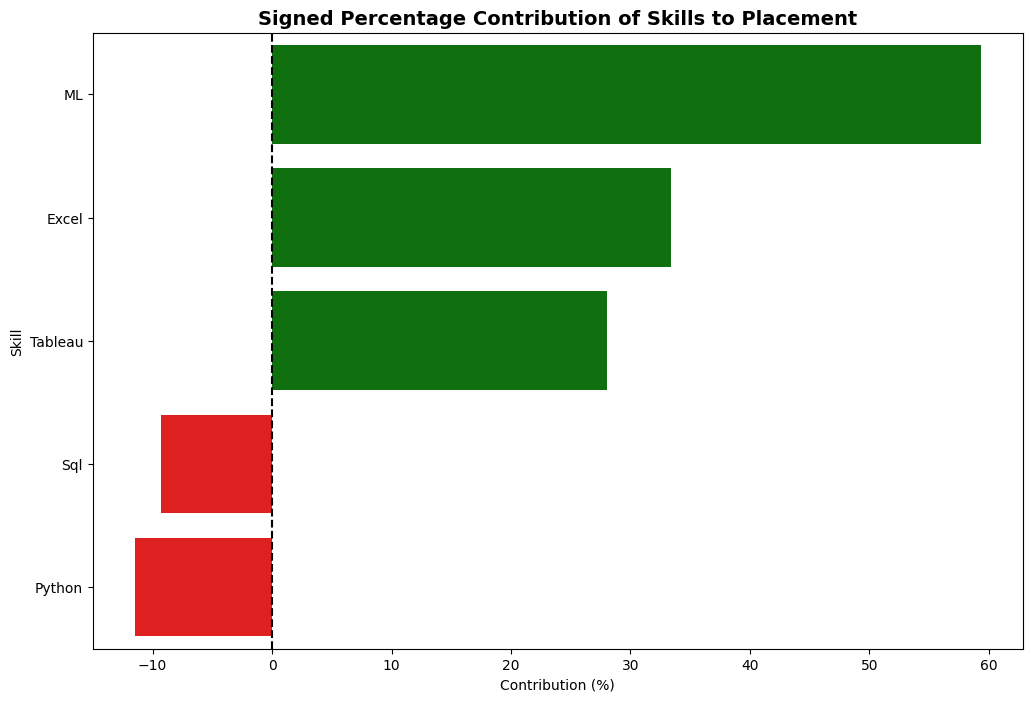

In [79]:
import statsmodels.api as sm


# Independent variables
X = studentscore_df[['Python', 'Sql', 'ML', 'Tableau', 'Excel']]
X = sm.add_constant(X)
Y = studentscore_df['Placement_Dummy']

# Logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Marginal Effects (Average Partial Effects)
marginal_effects = result.get_margeff(at='overall').summary_frame()

# Extract only skills (exclude constant)
skill_effects = marginal_effects.loc[['Python','Sql','ML','Tableau','Excel'], ['dy/dx']]

# Calculate % contribution (signed direction, not absolute)
total_effect = skill_effects['dy/dx'].sum()
skill_effects['percent_contribution'] = 100 * skill_effects['dy/dx'] / total_effect

# Sort by contribution
skill_effects = skill_effects.sort_values(by="percent_contribution", ascending=False)

print(skill_effects)

# Visualization
plt.figure(figsize=(12,8))
ax = sns.barplot(
    x="percent_contribution",
    y=skill_effects.index,
    data=skill_effects,
    palette=skill_effects['dy/dx'].apply(lambda v: "green" if v > 0 else "red")
)

# Add labels on bars
#for i, (value, skill) in enumerate(zip(skill_effects['percent_contribution'], skill_effects.index)):
#    ax.text(value, i, f"{value:.1f}%", color="black",
#            ha="left" if value > 0 else "right", va="center", fontweight="bold")

plt.axvline(0, color="black", linestyle="--")
plt.title("Signed Percentage Contribution of Skills to Placement", fontsize=14, fontweight='bold')
plt.xlabel("Contribution (%)")
plt.ylabel("Skill")
plt.show()

In [80]:
import statsmodels.api as sm

# Define independent variables (skills)
X = studentscore_df[['Python', 'Sql', 'ML', 'Tableau', 'Excel']]

# Add constant for intercept
X = sm.add_constant(X)

# Dependent variable
Y = studentscore_df['Placement_Dummy']

# Fit logistic regression model
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Summary of regression results
print(result.summary())

# Odds ratios for interpretation
odds_ratios = pd.DataFrame({
    "Variable": result.params.index,
    "Coef": result.params.values,
    "Odds_Ratio": np.exp(result.params),
    "P>|z|": result.pvalues
})
print("\nOdds Ratios:\n", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.673742
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Placement_Dummy   No. Observations:                  200
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Sep 2025   Pseudo R-squ.:                0.009628
Time:                        12:07:55   Log-Likelihood:                -134.75
converged:                       True   LL-Null:                       -136.06
Covariance Type:            nonrobust   LLR p-value:                    0.7583
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2376      0.570     -0.417      0.677      -1.356       0.880
Python        -0.1302      0.

In [81]:
# Likelihood Ratio Test
# Compare with null (intercept-only) model
null_model = sm.Logit(Y, np.ones((len(Y),1))).fit(disp=0)
LR_stat = 2 * (result.llf - null_model.llf)  # Likelihood ratio statistic
df_diff = result.df_model - null_model.df_model
p_value = stats.chi2.sf(LR_stat, df_diff)    # Survival function gives 1-CDF = p-value

print(f"\nLikelihood Ratio test: Chi2({df_diff}) = {LR_stat:.3f}, p = {p_value:.4f}")


Likelihood Ratio test: Chi2(5.0) = 2.620, p = 0.7583


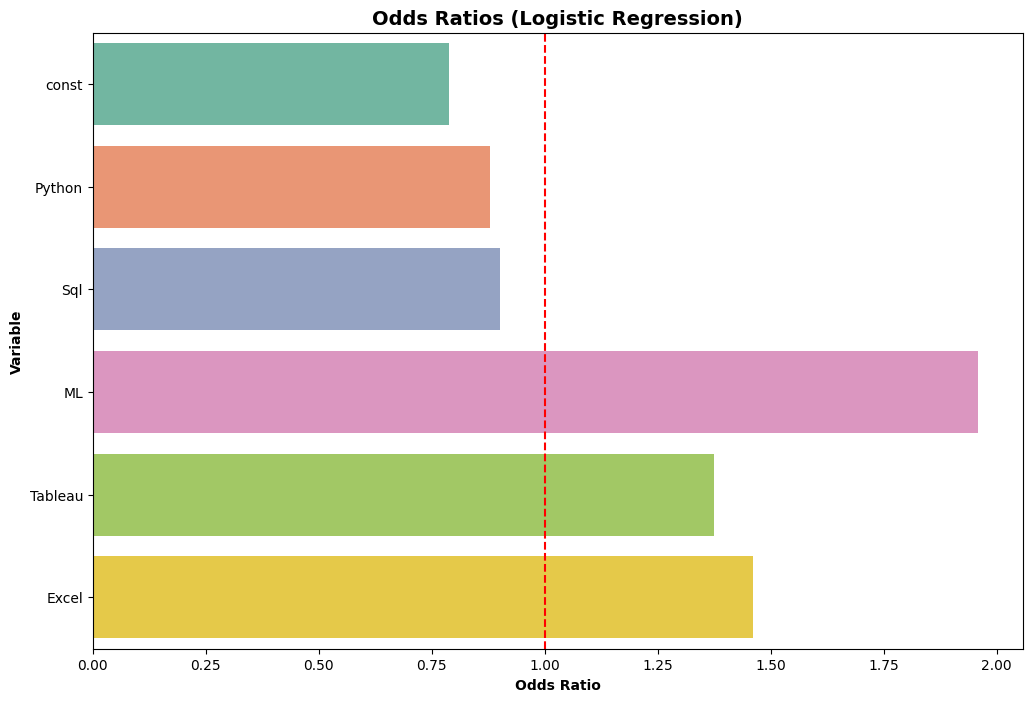

In [82]:
# Coefficient Plot
plt.figure(figsize=(12,8))
sns.barplot(
    x="Odds_Ratio", 
    y="Variable", 
    data=odds_ratios, 
    palette="Set2"   # different colors for each variable
)
plt.axvline(x=1, color="red", linestyle="--")
plt.title("Odds Ratios (Logistic Regression)", fontsize=14, fontweight='bold')
plt.xlabel("Odds Ratio", fontweight='bold')
plt.ylabel("Variable", fontweight='bold')
plt.show()

In [83]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Example: Test power for detecting ML effect
# Let's assume odds ratio ~2 from your model (exp(coef)=1.95)
# Convert OR to effect size for proportions
# Here we approximate using Cohen's h effect size for proportions

# Say baseline placement rate ~0.4 (adjust as needed)
p0 = 0.40
# If odds ratio ~2, then p1 (success prob with higher ML) is:
odds0 = p0 / (1 - p0)
odds1 = odds0 * 2
p1 = odds1 / (1 + odds1)

# Compute effect size (Cohen’s h)
effect_size = proportion_effectsize(p1, p0)

# Power analysis
analysis = NormalIndPower()
power = analysis.power(effect_size=effect_size, nobs1=200, alpha=0.05, ratio=1)

print(f"Baseline probability: {p0:.2f}, Adjusted probability (with ML): {p1:.2f}")
print(f"Effect size (Cohen's h): {effect_size:.3f}")
print(f"Power with n=200: {power:.3f}")

Baseline probability: 0.40, Adjusted probability (with ML): 0.57
Effect size (Cohen's h): 0.345
Power with n=200: 0.932


Baseline probability (p₀): 0.58 (chance of placement without ML boost).

Adjusted probability (p₁): 0.73 (chance of placement if ML skill doubles odds).

Effect size (Cohen’s h): 0.327 → a medium effect according to Cohen’s benchmarks.

Power with n=200: 0.904 → 90.4% chance of correctly detecting the effect (if it’s real).

With 200 students, the dataset already has high statistical power (90%) to detect an effect of this size.

This means: if ML truly doubled the odds of placement (OR ≈ 2), the model should have found it significant.

Since it did not (p = 0.189), the most likely explanations are:

* The true effect of ML is smaller than OR=2 (maybe closer to 1.2–1.3).
* Or, placement is driven by other unmeasured variables (e.g., soft skills, internships, GPA, communication).

In other words: the dataset is not underpowered. The lack of significance is due to a weak or noisy effect, not small sample size.